In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv', header = 0)

In [3]:
df.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [5]:
X = df.loc[:,df.columns!="Default"]
type(X)

pandas.core.frame.DataFrame

In [6]:
y = df["Default"]
type(y)

pandas.core.series.Series

In [7]:
X.head()

,Income,Loan Amount
0,15,8
1,30,8
2,5,9
3,22,10
4,33,12


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler().fit(X_train)

In [12]:
X_train_std = sc.transform(X_train)

In [13]:
X_test_std = sc.transform(X_test)

In [14]:
X_test_std

array([[-1.60599902, -1.27245495],
       [-0.5704892 ,  1.92384639],
       [ 0.81019055, -0.35470506],
       [ 0.46502061, -0.54458435],
       [-0.34037591,  1.60738091],
       [ 0.58007726,  1.25926889]])

In [15]:
from sklearn import svm

In [16]:
clf_svm_1 = svm.SVC(kernel='linear', C=0.01)
t0 = time.time()
clf_svm_1.fit(X_train_std, y_train)
svm_time = time.time() - t0
print("SVM model fitted in %.3f s" % svm_time)

SVM model fitted in 0.000 s


In [17]:
clf_svm_1 = svm.SVC(kernel='linear', C=0.01)
clf_svm_1.fit(X_train_std, y_train)

SVC(C=0.01, kernel='linear')

In [18]:
y_test_pred = clf_svm_1.predict(X_test_std)
y_train_pred = clf_svm_1.predict(X_train_std)

In [19]:
y_test_pred

array(['No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[4, 0],
       [2, 0]], dtype=int64)

In [23]:
accuracy_score(y_test, y_test_pred)

0.6666666666666666

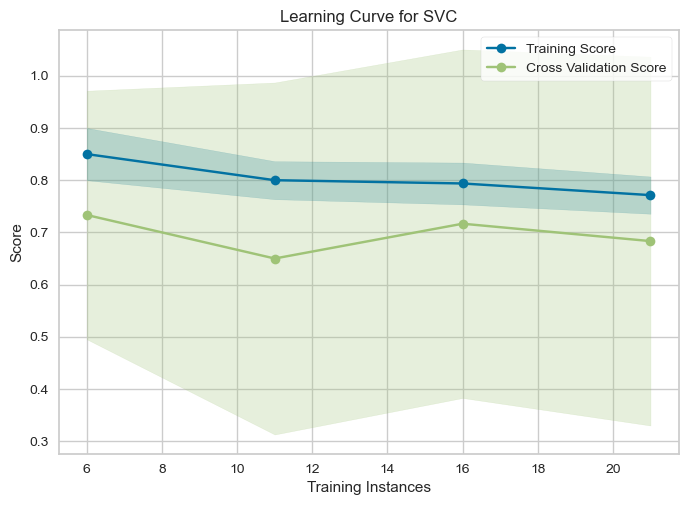

<Axes: title={'center': 'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [24]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
learning_curve = LearningCurve(clf_svm_1, cv=10)


# Fit the model on the training data
learning_curve.fit(X_train, y_train)

# Plot the learning curve
learning_curve.show()

In [25]:
clf_svm_1.n_support_

array([12, 11])

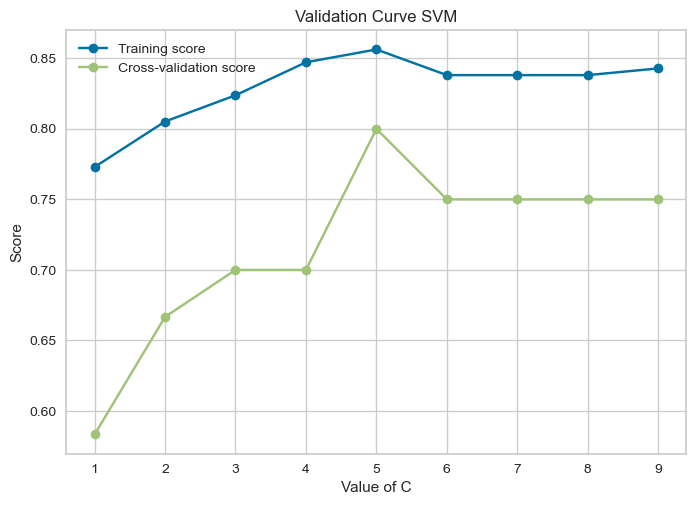

In [26]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score,validation_curve, GridSearchCV

param_range = np.arange(1, 10, 1)
#print(param_range)
train_scores, test_scores = validation_curve(svm.SVC(random_state=0), X_train, y_train, param_name="C", param_range=param_range, cv=10)
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve SVM')
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params = {'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 500, 1000)}

In [29]:
clf_svm_1 = svm.SVC(kernel = 'linear')

In [30]:
svm_grid_lin = GridSearchCV(clf_svm_1, params, n_jobs=-1,
                           cv=10, verbose=1, scoring='accuracy')

In [31]:
svm_grid_lin.fit(X_train_std, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [32]:
svm_grid_lin.best_params_

{'C': 0.5}

In [33]:
linsvm_clf = svm_grid_lin.best_estimator_

In [34]:
accuracy_score(y_test, linsvm_clf.predict(X_test_std))

0.8333333333333334

# Polynomial Kernel With Hyperparameter Tuning¶

In [35]:
clf_svm_p3 = svm.SVC(kernel ='poly',degree=2, C=0.01)
clf_svm_p3.fit(X_train_std, y_train)

SVC(C=0.01, degree=2, kernel='poly')

In [36]:
y_train_pred = clf_svm_p3.predict(X_train_std)
y_test_pred = clf_svm_p3.predict(X_test_std)

In [37]:
accuracy_score(y_test, y_test_pred)

0.6666666666666666

In [38]:
clf_svm_p3.n_support_

array([12, 11])

# SVM With Radial Kernel

In [39]:
clf_svm_r = svm.SVC(kernel ='rbf',gamma=0.5, C=1)
clf_svm_r.fit(X_train_std, y_train)

SVC(C=1, gamma=0.5)

In [40]:
y_train_pred = clf_svm_r.predict(X_train_std)
y_test_pred = clf_svm_r.predict(X_test_std)

In [41]:
accuracy_score(y_test, y_test_pred)

1.0

In [42]:
clf_svm_p3.n_support_

array([12, 11])

In [43]:
clf_svm_1 = svm.SVC(kernel='linear', C=0.01)
t0 = time.time()
clf_svm_1.fit(X_train_std, y_train)
svm_time = time.time() - t0
print("SVM model fitted in %.3f s" % svm_time)

SVM model fitted in 0.000 s


# Radial Grid

In [44]:
params = {'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50), 
               'gamma':(0.001, 0.01, 0.1, 0.5, 1)}

In [45]:
clf_svm_r = svm.SVC(kernel = 'rbf')

In [46]:
svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,
                           cv=3, verbose=1, scoring='accuracy')

In [47]:
svm_grid_rad.fit(X_train_std, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [48]:
svm_grid_rad.best_params_

{'C': 5, 'gamma': 0.1}

In [49]:
radsvm_clf = svm_grid_rad.best_estimator_

In [50]:
accuracy_score(y_test, radsvm_clf.predict(X_test_std))

0.8333333333333334